# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [64]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [65]:
# Put your EDA code here
#north_df.head()
#north_df.count()
#north_df['Rep ID'].count()

#1. How many reps are in each branch?
print('Number of reps in North Branch:', north_df['Rep ID'].nunique())
print('Number of reps in South Branch:', south_df['Rep ID'].nunique())

#2. What is the average busy minutes, not ready minutes, incoming wait time, 
#   and during call wait time for each branch?
print('North Branch Avg. Busy Minutes:', north_df['Busy Minutes'].mean())
print('South Branch Avg. Busy Minutes:', south_df['Busy Minutes'].mean())

print('North Branch Avg. Not Ready Minutes:', north_df['Not Ready Minutes'].mean())
print('South Branch Avg. Not Ready Minutes:', south_df['Not Ready Minutes'].mean())

print('North Branch Avg. Incoming Wait Time:', north_df['Incoming Wait Time'].mean())
print('South Branch Avg. Incoming Wait Time:', south_df['Incoming Wait Time'].mean())

print('North Branch Avg. During Call Wait Time:', north_df['During Call Wait Time'].mean())
print('South Branch Avg. During Call Wait Time:', south_df['During Call Wait Time'].mean())

#3. What is the number of calls taken for each time block?
print('North Branch number of calls taken for each time block:', north_df['Time Block'].value_counts())
print('South Branch number of calls taken for each time block:', south_df['Time Block'].value_counts())

Number of reps in North Branch: 9
Number of reps in South Branch: 11
North Branch Avg. Busy Minutes: 9.987755102040817
South Branch Avg. Busy Minutes: 10.054140127388536
North Branch Avg. Not Ready Minutes: 1.9142857142857144
South Branch Avg. Not Ready Minutes: 1.910828025477707
North Branch Avg. Incoming Wait Time: 3.048780487804878
South Branch Avg. Incoming Wait Time: 3.0
North Branch Avg. During Call Wait Time: 2.9673469387755103
South Branch Avg. During Call Wait Time: 3.0764331210191083
North Branch number of calls taken for each time block: 12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64
South Branch number of calls taken for each time block: 12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64


### EDA Results

Make note of your results here!

1. How many reps are in each branch?
Number of reps in North Branch: 9
Number of reps in South Branch: 11

2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
North Branch Avg. Busy Minutes: 9.987755102040817
South Branch Avg. Busy Minutes: 10.054140127388536
North Branch Avg. Not Ready Minutes: 1.9142857142857144
South Branch Avg. Not Ready Minutes: 1.910828025477707
North Branch Avg. Incoming Wait Time: 3.048780487804878
South Branch Avg. Incoming Wait Time: 3.0
North Branch Avg. During Call Wait Time: 2.9673469387755103
South Branch Avg. During Call Wait Time: 3.0764331210191083

3. What is the number of calls taken for each time block?
North Branch number of calls taken for each time block: 
12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
South Branch number of calls taken for each time block:
12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [63]:
# Clean your data here
#1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

print('North Branch:', north_df['Incoming Wait Time'].isnull().groupby([north_df['Incoming or Outgoing']]).sum())
print('South Branch:', south_df['Incoming Wait Time'].isnull().groupby([south_df['Incoming or Outgoing']]).sum())

#2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
print('Before North Branch Sale value counts:', north_df['Sale'].value_counts())
north_df['Sale']=north_df['Sale'].str.rstrip()
print('After North Branch Sale value counts:', north_df['Sale'].value_counts())

#3. Are there duplicates in the two data sets? If there are, how did you handle them?
northDuplicateRowsDF = north_df[north_df.duplicated()] 
print('North Branch data duplicate rows:', northDuplicateRowsDF.size)

southDuplicateRowsDF = south_df[south_df.duplicated()] 
print('North Branch data duplicate rows:', southDuplicateRowsDF.size)

#4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
#north_df = north_df.drop(['Branch', 'Calls'], axis=1)
#south_df = south_df.drop(['Branch', 'Calls'], axis=1)


North Branch: Incoming or Outgoing
Incoming      0
Outgoing    163
Name: Incoming Wait Time, dtype: int64
South Branch: Incoming or Outgoing
Incoming      0
Outgoing    188
Name: Incoming Wait Time, dtype: int64
Before North Branch Sale value counts: NO     234
YES     11
Name: Sale, dtype: int64
After North Branch Sale value counts: NO     234
YES     11
Name: Sale, dtype: int64
North Branch data duplicate rows: 0
North Branch data duplicate rows: 0


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

YES.
North Branch: Incoming or Outgoing
Incoming      0
Outgoing    163

South Branch: Incoming or Outgoing
Incoming      0
Outgoing    188

2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

Same YES value is treated as two different due to trailing space, so we need to correct that value.
Before North Branch Sale value counts: 
NO      234
YES      10
YES       1

After North Branch Sale value counts: 
NO     234
YES     11


3. Are there duplicates in the two data sets? If there are, how did you handle them?

No duplicates. northDuplicateRowsDF = north_df[north_df.duplicated()] 

4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

Yes. Columns Branch and Calls have all same values and don't add any insights.  Drop those columns using north_df.drop(['Branch', 'Calls'], axis=1)

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [104]:
# Manipulate data here
frames = [north_df, south_df]
df = pd.concat(frames)

#1. Group by Rep ID and sum the resulting structure. 
#.  Sort by calls to determine which rep in each branch has the highest number of calls.
repCallsDesc = df.groupby(['Rep ID'])['Rep ID'].count().sort_values(ascending=False)
print("Total calls by each Rep desc: ", repCallsDesc)

#2. The average call abandonment rate is a KPI when it comes to 
#.  determining call center efficiency. As you may recall, 
#.  abandoned calls are calls where the customer hangs up due to long call times. 
#.  What is the average call abandonment rate for each branch and the whole company? 
#.  Do any of these fall out of the optimal range of 2-5%?
northAbandonedValueCounts = north_df.Abandoned.value_counts()
southAbandonedValueCounts = south_df.Abandoned.value_counts()
companyAbandonedValueCounts = df.Abandoned.value_counts()
print('North branch Abandoned calls %ge:', northAbandonedValueCounts/northAbandonedValueCounts.sum()*100)
print('South branch Abandoned calls %ge:', southAbandonedValueCounts/southAbandonedValueCounts.sum()*100)
print('Company Abandoned calls %ge:', companyAbandonedValueCounts/companyAbandonedValueCounts.sum()*100)

#3. 
northIncoming_df = north_df[north_df['Incoming or Outgoing'] == 'Incoming']
northBranchServiceLevel=(northIncoming_df[northIncoming_df['Incoming Wait Time']<=2.0]['Incoming or Outgoing'].count())/northIncoming_df['Incoming or Outgoing'].count() * 100
print('North Branch Service Level %:', northBranchServiceLevel)

southIncoming_df = south_df[south_df['Incoming or Outgoing'] == 'Incoming']
southBranchServiceLevel=(southIncoming_df[southIncoming_df['Incoming Wait Time']<=2.0]['Incoming or Outgoing'].count())/southIncoming_df['Incoming or Outgoing'].count() * 100
print('South Branch Service Level %:', southBranchServiceLevel)

companyIncoming_df = df[df['Incoming or Outgoing'] == 'Incoming']
companyServiceLevel=(companyIncoming_df[companyIncoming_df['Incoming Wait Time']<=2.0]['Incoming or Outgoing'].count())/companyIncoming_df['Incoming or Outgoing'].count() * 100
print('Company Service Level %:', companyServiceLevel)

#4. Avg. speed of answer
northAvgAnsSpeed = north_df['Incoming Wait Time'].mean()
print('North Branch Average Speed of Answer:', northAvgAnsSpeed)

southAvgAnsSpeed = south_df['Incoming Wait Time'].mean()
print('South Branch Average Speed of Answer:', southAvgAnsSpeed)

companyAvgAnsSpeed = df['Incoming Wait Time'].mean()
print('Company Average Speed of Answer:', companyAvgAnsSpeed)


Total calls by each Rep desc:  Rep ID
Brent     37
Eric      35
Randy     33
Sandy     32
Helga     31
Lilly     30
Todd      29
Duke      29
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Joe       26
Sharon    25
Xander    24
Cam       24
Amanda    23
Andy      23
Alice     20
Name: Rep ID, dtype: int64
North branch Abandoned calls %ge: 0    97.142857
1     2.857143
Name: Abandoned, dtype: float64
South branch Abandoned calls %ge: 0    98.726115
1     1.273885
Name: Abandoned, dtype: float64
Company Abandoned calls %ge: 0    98.0322
1     1.9678
Name: Abandoned, dtype: float64
North Branch Service Level %: 40.243902439024396
South Branch Service Level %: 38.095238095238095
Company Service Level %: 38.94230769230769
North Branch Average Speed of Answer: 3.048780487804878
South Branch Average Speed of Answer: 3.0
Company Average Speed of Answer: 3.019230769230769


### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.


Brent     37
Eric      35
Randy     33
Sandy     32
Helga     31
Lilly     30
Todd      29
Duke      29
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Joe       26
Sharon    25
Xander    24
Cam       24
Amanda    23
Andy      23
Alice     20

2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

North branch Abandoned calls %ge: 
1     2.857143

South branch Abandoned calls %ge: 
1     1.273885

Company Abandoned calls %ge: 
1     1.9678

3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?

North Branch Service Level %: 40.243902439024396
South Branch Service Level %: 38.095238095238095
Company Service Level %: 38.94230769230769

4. For each branch and the entire company, what is the average speed of answer?


North Branch Average Speed of Answer: 3.048780487804878
South Branch Average Speed of Answer: 3.0
Company Average Speed of Answer: 3.019230769230769


## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

<BarContainer object of 4 artists>

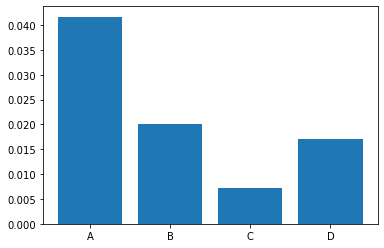

In [135]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]
    
plt.bar(*zip(*abandonment_rates.items()))

In [141]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

service_level

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


( 51 198 310 )


<BarContainer object of 3 artists>

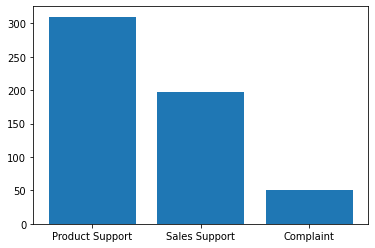

In [140]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = df["Call Purpose"].value_counts()
#purpose_counts
complaints = purpose_counts["Complaint"] #.to_dict()
sales_support = purpose_counts["Sales Support"]#.to_dict()
product_support = purpose_counts["Product Support"]#.to_dict()

#print('(', complaints, sales_support, product_support, ')')
plt.bar(*zip(*purpose_counts.items()))

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

North branch Abandoned calls %ge: 2.857143
South branch Abandoned calls %ge: 1.273885

North Branch Service Level %: 40.243902439024396
South Branch Service Level %: 38.095238095238095

North Branch Average Speed of Answer: 3.048780487804878
South Branch Average Speed of Answer: 3.0

2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?


3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
